<a href="https://colab.research.google.com/github/sxxgwoo/RL/blob/main/maze_random_simpleTabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Maze Random

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


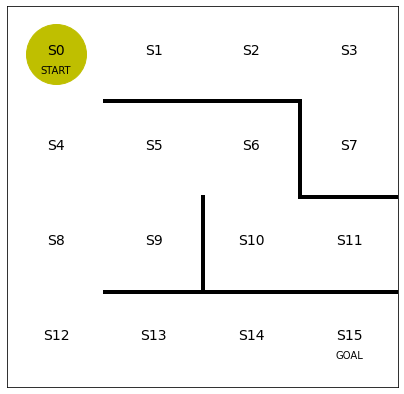

In [2]:
# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(7, 7))
ax = plt.gca()


# 상태를 의미하는 문자열(S0~S15) 표시
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')

plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# 붉은 벽 그리기
plt.plot([1, 3], [3, 3], color='black', linewidth=4) #(1,3)에서 (3,3) 라인인
plt.plot([3, 3], [3, 2], color='black', linewidth=4)
plt.plot([3, 4], [2, 2], color='black', linewidth=4)
plt.plot([1, 4], [1, 1], color='black', linewidth=4)
plt.plot([2, 2], [1, 2], color='black', linewidth=4)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [3.5], marker="o", color='y', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# row: state 0~14, column: action (상,하,좌,우 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, np.nan, 1],  # s0
                    [np.nan, np.nan, 1, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [np.nan, 1, 1, np.nan],  # s3
                    [1, 1, np.nan, 1],  # s4
                    [np.nan, 1, 1, 1],  # s5
                    [np.nan, 1, 1, np.nan],  # s6
                    [1, np.nan, np.nan, np.nan],  # s7
                    [1, 1, np.nan, 1],  # s8
                    [1, np.nan, 1, np.nan],  # s9
                    [1, np.nan, np.nan, 1],  # s10
                    [np.nan, np.nan, 1, np.nan],  # s11
                    [1, np.nan, np.nan, 1],  # s12
                    [np.nan, np.nan, 1, 1],  # s13
                    [np.nan, np.nan, 1, 1],  # s14
                    ])

In [4]:
# 정책 파라미터 theta를 행동정책 pi로 변환하는 함수


def simple_convert_into_pi_from_theta(theta):
    '''단순히 값의 비율을 계산'''

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산 
                                                        # np.nansum:Return the sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.
    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi


In [5]:
# 초기 정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)


In [6]:
# 초기 정책 pi_0을 출력
pi_0

array([[0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ]])

In [7]:
# 1단계 이동 후의 상태 s를 계산하는 함수


def get_next_s(pi, s):
    direction = ["up", "down", "left", "right"] #상하좌우우

    next_direction = np.random.choice(direction, p=pi[s, :]) #랜덤 추출함수
    # pi[s,;]의 확률에 따라, direction 값이 선택된다

    if next_direction == "up":
        s_next = s - 4  # 위로 이동하면 상태값이 4 줄어든다
    elif next_direction == "right":
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 4  # 아래로 이동하면 상태값이 4 늘어난다
    elif next_direction == "left":
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return s_next


In [8]:
# 목표 지점에 이를 때까지 에이전트를 계속 이동시키는 함수


def goal_maze(pi):
    s = 0  # 시작 지점
    state_history = [0]  # 에이전트의 경로를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 경로 리스트에 다음 상태(위치)를 추가

        if next_s == 15:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return state_history


In [26]:
# 목표 지점에 이를 때까지 미로 안을 이동
state_history = goal_maze(pi_0)


In [27]:
print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) - 1) + "단계입니다")


[0, 1, 2, 1, 0, 4, 8, 9, 5, 4, 8, 12, 13, 12, 8, 4, 8, 4, 8, 12, 8, 12, 13, 14, 15]
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다


In [28]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''배경 이미지 초기화'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]  # 현재 위치
    x = (state % 4) + 0.5  # 상태의 x좌표 : 4로 나눈 나머지 + 0.5
    y = 3.5 - int(state / 4)  # y좌표 : 2.5에서 4로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
